In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import pandas as pd
from utilities import get_hashtags, clean_tweet, translate_emoji

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
text = "Covid cases are increasing fast!"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(config.id2label[scores.argmax()])

negative


In [3]:
# function to predict sentiment
def predict_sentiment(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return config.id2label[scores.argmax()]

print(predict_sentiment("Covid cases are increasing fast!"))

negative


In [4]:
# load parquet file
tweets_df = pd.read_parquet("tweets_from_2019-01-01_to_2019-01-02.parquet")

In [5]:
tweets_df['Tweet_clean'] = tweets_df['Tweet'].apply(translate_emoji).apply(clean_tweet)

In [6]:
# sample clean tweets and the bank they are from
new_df = tweets_df[['Tweet_clean', 'Bank']].copy()
new_df['Sentiment'] = new_df['Tweet_clean'].apply(predict_sentiment)

<AxesSubplot: xlabel='Bank'>

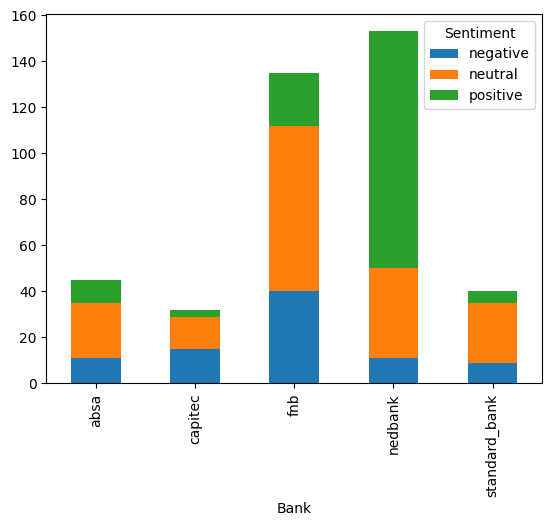

In [7]:
# plot the sentiment distribution for each bank
new_df.groupby('Bank')['Sentiment'].value_counts().unstack().plot(kind='bar', stacked=True)

In [8]:
new_df[['Tweet_clean', 'Sentiment']].values

array([['trippin man facepalming medium skin tone gotta give ito gunna',
        'neutral'],
       ['fake news or nah i needed to see that sms from fnb kavailable balance ya meter especially ka di byana i thank rich twitter for the motivation',
        'neutral'],
       ['them circled m coming in i let em stack up money bag don t ride my water wave dog back up man gesturing no medium skin tone https t co eitceie',
        'neutral'],
       ['fnb iso annoying witheir unauthorizedebit orders that just deduct money ain t my money supposed to be safe with u',
        'negative'],
       ['forgethe critics let tart on a high january fnb stadium ha e ya lala ya kupa',
        'neutral'],
       ['lol the sequence is fnb messages zangena a lil while later napsa from the salaryou got we ve got cause we running a statutory ponzi scheme and we buying our managers new cars every years thank you',
        'neutral'],
       ['i don t watch tennis that much buh i just like this two too much',
  